In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This project focuses on predicting the success status of startups using historical and financial attributes. The dataset contains information related to funding, age, milestones, and operational status of startups. The objective is to frame this as a classification problem, where the target variable represents whether a startup succeeds or fails.
By performing exploratory data analysis (EDA) and applying machine learning models, the goal is to identify patterns and key factors that influence startup outcomes.

# EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
df = pd.read_csv("startup data.csv")

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
Unnamed: 0,1005,204,1001,738,1002,379,195,875,16,846,...,157,879,228,284,1099,352,721,557,589,462
state_code,CA,CA,CA,CA,CA,CA,CA,CA,MA,CA,...,TX,NY,WI,NY,WA,CA,MA,CA,CA,CA
latitude,42.35888,37.238916,32.901049,37.320309,37.779281,37.406914,37.391559,38.057107,42.712207,37.427235,...,29.739322,40.750519,43.090756,40.742953,47.802184,37.740594,42.504817,37.408261,37.556732,37.386778
longitude,-71.05682,-121.973718,-117.192656,-122.05004,-122.419236,-122.09037,-122.070264,-122.513742,-73.203599,-122.145783,...,-95.444747,-73.993494,-89.522805,-73.984461,-122.196307,-122.376471,-71.195611,-122.01592,-122.288378,-121.966277
zip_code,92101,95032,92121,95014,94105,94043,94041,94901,1267,94306,...,77027,10001,53562,10018,98021,94107,1803,94089,94404,95054
id,c:6669,c:16283,c:65620,c:42668,c:65806,c:22898,c:16191,c:5192,c:1043,c:498,...,c:15509,c:52378,c:167,c:17758,c:8339,c:21343,c:41747,c:31549,c:33198,c:26702
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco,Mountain View,Mountain View,San Rafael,Williamstown,Palo Alto,...,Houston,New York,Middleton,New York,Bothell,San Francisco,Burlington,Sunnyvale,San Francisco,Santa Clara
Unnamed: 6,NaN,NaN,San Diego CA 92121,Cupertino CA 95014,San Francisco CA 94105,Mountain View CA 94043,NaN,NaN,Williamstown MA 1267,NaN,...,NaN,New York NY 10001,NaN,NaN,NaN,NaN,Burlington MA 1803,NaN,NaN,Santa Clara CA 95054
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital,Matisse Networks,RingCube Technologies,ClairMail,VoodooVox,Doostang,...,Rudder,Panvidea,Sway,TRAFFIQ,Dexterra,CoTweet,Reef Point Systems,Paracor Medical,Causata,Asempra Technologies
labels,1,1,1,1,0,0,1,1,1,1,...,0,1,0,1,1,1,0,0,1,1


In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1005,204,1001,738,1002
state_code,CA,CA,CA,CA,CA
latitude,42.35888,37.238916,32.901049,37.320309,37.779281
longitude,-71.05682,-121.973718,-117.192656,-122.05004,-122.419236
zip_code,92101,95032,92121,95014,94105
id,c:6669,c:16283,c:65620,c:42668,c:65806
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
Unnamed: 6,NaN,NaN,San Diego CA 92121,Cupertino CA 95014,San Francisco CA 94105
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [6]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [7]:
 df[df['state_code.1'].isnull()]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,1110,CA,37.451124,-122.166264,94025,c:856,Menlo Park,NaN,Cuil,0,...,c:856,0,0,1,1,0,0,2.5,1,closed


In [8]:
df[df.duplicated()]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


In [9]:
corr = df.corr(numeric_only = True)

In [10]:
df.corr(numeric_only = True)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,...,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,...,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,...,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,...,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,...,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,...,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,...,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,...,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,...,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,...,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


<Axes: >

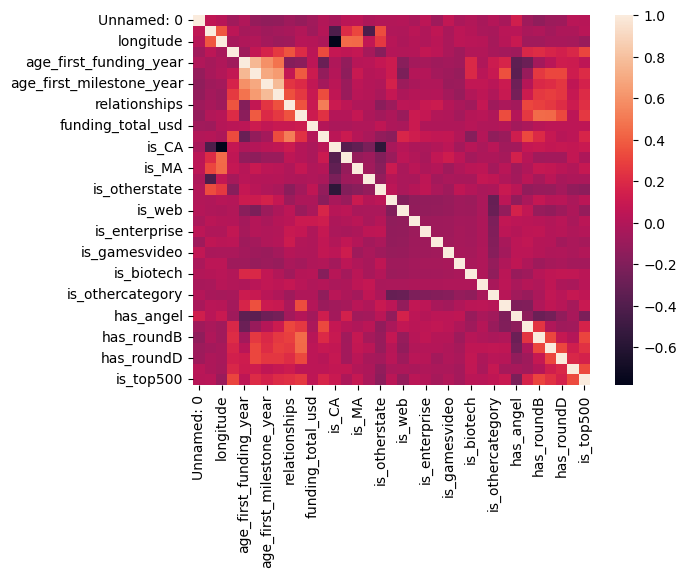

In [11]:
sns.heatmap(corr)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
 df[df['age_first_milestone_year'].isnull()]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
12,531,KY,38.241467,-85.724511,40204,c:30290,Louisville,NaN,Resonant Vibes,0,...,c:30290,1,0,0,0,0,0,1.0000,0,closed
15,898,VA,38.901301,-77.265158,22182,c:54177,Vienna,Vienna VA 22182,Invicta Networks,0,...,c:54177,1,0,0,0,0,0,1.0000,0,closed
24,803,CO,40.010492,-105.276843,80302,c:458,Boulder,NaN,EventVue,0,...,c:458,0,1,1,0,0,0,4.5000,1,closed
32,485,NC,36.002893,-78.904075,27701,c:27741,Durham,NaN,eMinor,0,...,c:27741,0,0,1,1,0,0,2.5000,1,closed
34,605,PA,40.441694,-79.990086,15219,c:34338,Pittsburgh,Pittsburgh PA 15219,Zipano,0,...,c:34338,0,1,0,0,0,0,1.0000,0,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,553,CO,39.635009,-106.521346,81620,c:31452,Avon,NaN,Natural Cleaners Colorado,0,...,c:31452,0,0,1,0,0,0,1.0000,1,closed
903,469,CA,37.354469,-121.990433,95051,c:27021,Santa Clara,Santa Clara CA 95051,AGEIA Technologies,1,...,c:27021,0,0,0,0,1,0,7.0000,1,acquired
904,742,TX,29.758938,-95.367697,77046,c:43133,Houston,Houston TX 77046,U.S. Fiduciary,0,...,c:43133,0,0,0,0,0,1,2.0000,1,closed
906,290,CA,59.335232,18.057121,95054,c:17884,Santa Clara,NaN,Xelerated,1,...,c:17884,0,0,0,0,1,1,4.6667,1,acquired


Feature Unnamed: 6 is missing some data, but the feature seems to be just a merge of city, state_code, and zip_code features. We believe this is safe to drop.

In [14]:
df.loc[:,['state_code','city','zip_code','Unnamed: 6']]

,state_code,city,zip_code,Unnamed: 6
0,CA,San Diego,92101,NaN
1,CA,Los Gatos,95032,NaN
2,CA,San Diego,92121,San Diego CA 92121
3,CA,Cupertino,95014,Cupertino CA 95014
4,CA,San Francisco,94105,San Francisco CA 94105
...,...,...,...,...
918,CA,San Francisco,94107,NaN
919,MA,Burlington,1803,Burlington MA 1803
920,CA,Sunnyvale,94089,NaN
921,CA,San Francisco,94404,NaN


([<matplotlib.patches.Wedge at 0x214827df380>,
 [Text(-0.4895236355545733, 0.9850718807444631, 'acquired'),
  Text(0.48952325195338225, -0.9850720713719304, 'closed')],
 [Text(-0.2670128921206763, 0.5373119349515252, '64.7%'),
  Text(0.26701268288366303, -0.5373120389301438, '35.3%')])

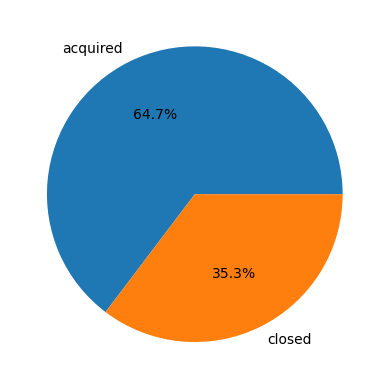

In [15]:
plt.pie(df['status'].value_counts(),labels = ['acquired','closed'],autopct='%1.1f%%')


In [16]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [17]:
pd.crosstab(df['status'], df['labels'])


labels,0,1
status,,
acquired,0,597
closed,326,0


# FUNDING VS STATUS OF THE COMPANY

In [18]:
df.groupby('status')['funding_total_usd'].median()


status
acquired    12700000.0
closed       5000000.0
Name: funding_total_usd, dtype: float64

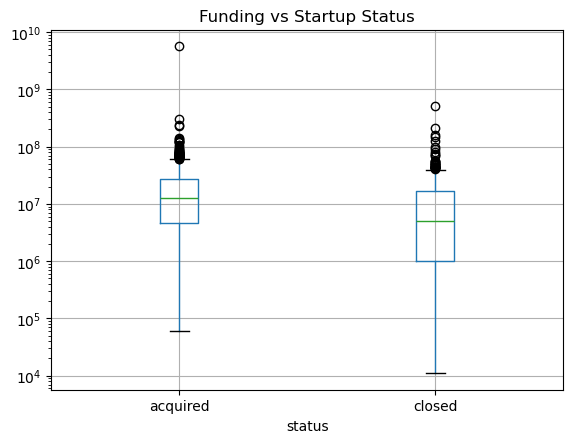

In [19]:
df.boxplot(column='funding_total_usd', by='status')
plt.yscale('log')
plt.title("Funding vs Startup Status")
plt.suptitle("")
plt.show()


In [20]:
df.groupby('status')[[
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year'
]].mean()


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
status,,,,
acquired,2.095389,4.093073,3.361397,5.295417
closed,2.492452,3.635489,2.293706,3.408055


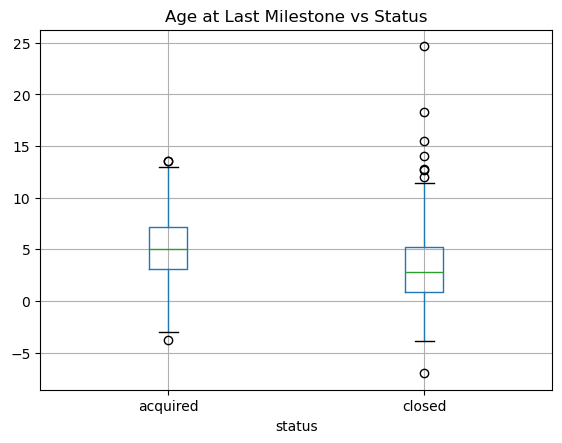

In [21]:
df.boxplot(column='age_last_milestone_year', by='status')
plt.title("Age at Last Milestone vs Status")
plt.suptitle("")
plt.show()


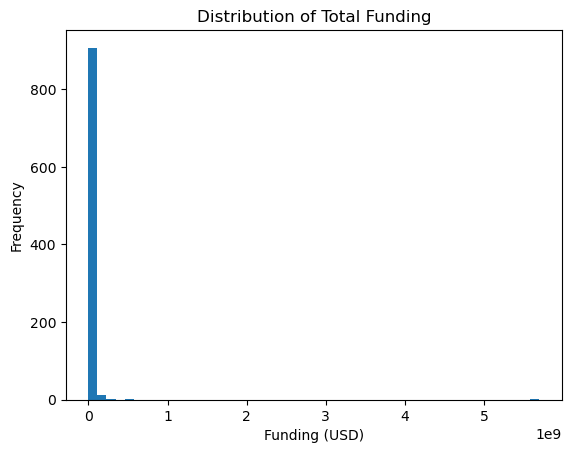

In [22]:
plt.hist(df['funding_total_usd'], bins=50)
plt.title("Distribution of Total Funding")
plt.xlabel("Funding (USD)")
plt.ylabel("Frequency")
plt.show()


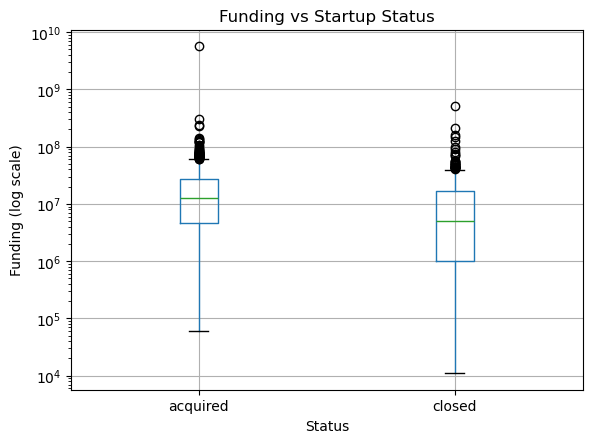

In [23]:
df.boxplot(column='funding_total_usd', by='status')
plt.yscale('log')
plt.title("Funding vs Startup Status")
plt.suptitle("")
plt.xlabel("Status")
plt.ylabel("Funding (log scale)")
plt.show()


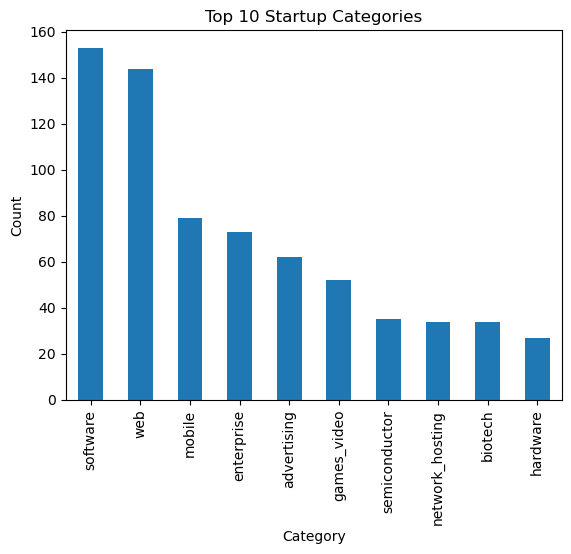

In [24]:
df['category_code'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Startup Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='State', ylabel='Number of Successful Startups'>

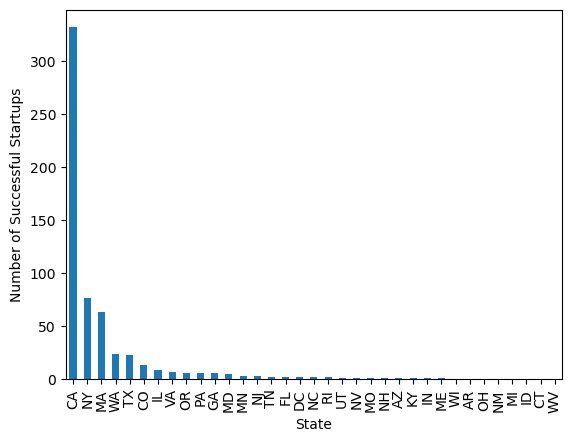

In [25]:
group_state = df.groupby('state_code')['labels']
group_state = group_state.sum().sort_values(ascending=False)
group_state.plot(kind='bar', xlabel='State', ylabel='Number of Successful Startups')

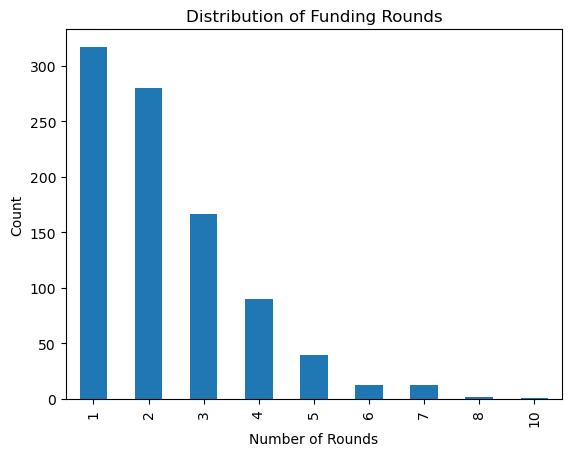

In [26]:
df['funding_rounds'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Funding Rounds")
plt.xlabel("Number of Rounds")
plt.ylabel("Count")
plt.show()


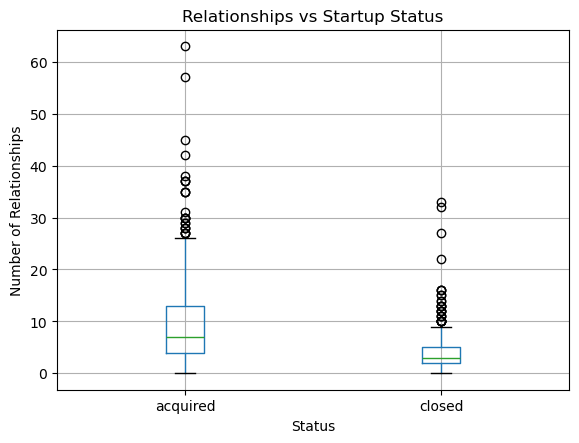

In [27]:
df.boxplot(column='relationships', by='status')
plt.title("Relationships vs Startup Status")
plt.suptitle("")
plt.xlabel("Status")
plt.ylabel("Number of Relationships")
plt.show()


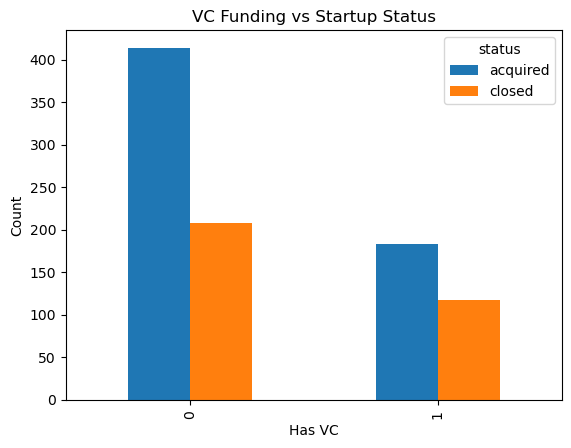

In [28]:
pd.crosstab(df['has_VC'], df['status']).plot(kind='bar')
plt.title("VC Funding vs Startup Status")
plt.xlabel("Has VC")
plt.ylabel("Count")
plt.show()


In [29]:
df1 = df.copy()

In [30]:
df1.loc[:, ['state_code', 'zip_code', 'city', 'Unnamed: 6']]

,state_code,zip_code,city,Unnamed: 6
0,CA,92101,San Diego,NaN
1,CA,95032,Los Gatos,NaN
2,CA,92121,San Diego,San Diego CA 92121
3,CA,95014,Cupertino,Cupertino CA 95014
4,CA,94105,San Francisco,San Francisco CA 94105
...,...,...,...,...
918,CA,94107,San Francisco,NaN
919,MA,1803,Burlington,Burlington MA 1803
920,CA,94089,Sunnyvale,NaN
921,CA,94404,San Francisco,NaN


Unnamed 6 is just statecode zip code and city so we are going to drop it

In [31]:
df1.drop('Unnamed: 6',axis =1,inplace = True)

In [32]:
df1.drop('Unnamed: 0',axis =1,inplace =True)

In [33]:
df1.drop(['id', 'object_id'], axis=1, inplace=True)

Features id and object_id are identical. Since there is no need for either feature, we believe it is safe to drop both features

In [34]:
df1

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,1/1/2009,NaN,7/9/2009,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,1/1/2009,NaN,10/5/2009,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [35]:
df1.loc[:, ['labels', 'status']]

,labels,status
0,1,acquired
1,1,acquired
2,1,acquired
3,1,acquired
4,0,closed
...,...,...
918,1,acquired
919,0,closed
920,0,closed
921,1,acquired


Labels are the Binary version of status column so we are deleting labels 

In [36]:
df1.drop("labels",axis =1,inplace = True)

# State code and state code 1 is the same

In [37]:
df1.drop(['state_code.1'], axis=1, inplace=True)

In [38]:
df1.iloc[[124, 832]]

,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,CA,37.54827,-121.988572,94538,Fremont,Redwood Systems,1/1/2008,NaN,10/3/2008,5/30/2012,...,1,1,0,1,1,1,0,2.25,1,acquired
832,CA,37.48151,-121.945328,94538,Fremont,Redwood Systems,1/1/2008,NaN,10/3/2008,5/30/2012,...,1,1,0,1,1,1,0,2.25,1,acquired


In [39]:
df1

,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [40]:
df1.drop(832, axis=0, inplace=True)


In [41]:
df1 = df1.reset_index()


In [42]:
df1.isnull().sum()

index                         0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecomm

In [43]:
df1

,index,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,NaN,4/1/2009,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,NaN,2/14/2005,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,NaN,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,NaN,2/17/2005,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,NaN,7/9/2009,...,0,0,0,1,0,0,0,6.0000,1,acquired
918,919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,...,1,1,0,0,1,0,0,2.6667,1,closed
919,920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,...,0,0,0,0,0,0,1,8.0000,1,closed
920,921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,NaN,10/5/2009,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [44]:
 df1[df1['age_first_milestone_year'].isnull()]

,index,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
12,12,KY,38.241467,-85.724511,40204,Louisville,Resonant Vibes,1/1/2004,4/27/2012,11/25/2008,...,0,1,0,0,0,0,0,1.0000,0,closed
15,15,VA,38.901301,-77.265158,22182,Vienna,Invicta Networks,1/1/1999,3/28/2010,8/9/2005,...,1,1,0,0,0,0,0,1.0000,0,closed
24,24,CO,40.010492,-105.276843,80302,Boulder,EventVue,5/1/2007,2/1/2010,8/1/2007,...,1,0,1,1,0,0,0,4.5000,1,closed
32,32,NC,36.002893,-78.904075,27701,Durham,eMinor,10/1/2006,2/17/2012,8/1/2006,...,0,0,0,1,1,0,0,2.5000,1,closed
34,34,PA,40.441694,-79.990086,15219,Pittsburgh,Zipano,6/1/2009,5/27/2012,7/1/2009,...,1,0,1,0,0,0,0,1.0000,0,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,CO,39.635009,-106.521346,81620,Avon,Natural Cleaners Colorado,1/1/2005,3/5/2010,8/27/2008,...,1,0,0,1,0,0,0,1.0000,1,closed
902,903,CA,37.354469,-121.990433,95051,Santa Clara,AGEIA Technologies,1/1/2002,NaN,10/3/2005,...,1,0,0,0,0,1,0,7.0000,1,acquired
903,904,TX,29.758938,-95.367697,77046,Houston,U.S. Fiduciary,1/1/2003,4/17/2009,4/12/2007,...,1,0,0,0,0,0,1,2.0000,1,closed
905,906,CA,59.335232,18.057121,95054,Santa Clara,Xelerated,1/1/2000,NaN,4/20/2005,...,1,0,0,0,0,1,1,4.6667,1,acquired


In [45]:
df1.isnull().sum()

index                         0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecomm

Missing values in the closed_at feature seem to be related to a status of acquired. Logically, this makes sense; if the startup has been acquired or gone public, then it hasn't shut down. With over 63% missing values, it might be wiser to ignore this feature rather than try to impute an arbitrary value. Moreover, knowing when a startup shut down does not help us predict whether it will be successful or not since at that point, the startup has already failed.

In [46]:
df1.loc[:, ['closed_at', 'status']][:20]

,closed_at,status
0,NaN,acquired
1,NaN,acquired
2,NaN,acquired
3,NaN,acquired
4,10/1/2012,closed
5,2/15/2009,closed
6,NaN,acquired
7,NaN,acquired
8,NaN,acquired
9,NaN,acquired


In [47]:
df1['closed_at'] = df1['closed_at'].fillna(value="12/31/2013")

In [48]:
milestone_first_last = df.loc[(df['age_first_milestone_year'].isnull()) & (df['age_last_milestone_year'].isnull()) & (df['milestones'] == 0)]
print("Missing values in age_first_milestone_year and age_last_milestone_year with 0 milestones:", len(milestone_first_last))
milestone_first_last.loc[:, ['age_first_milestone_year', 'age_last_milestone_year', 'milestones']]

Missing values in age_first_milestone_year and age_last_milestone_year with 0 milestones: 152


,age_first_milestone_year,age_last_milestone_year,milestones
12,NaN,NaN,0
15,NaN,NaN,0
24,NaN,NaN,0
32,NaN,NaN,0
34,NaN,NaN,0
...,...,...,...
885,NaN,NaN,0
903,NaN,NaN,0
904,NaN,NaN,0
906,NaN,NaN,0


After an analysis of the data it was discovered that the same 152 records with missing values in age_first_milestone_year and age_last_milestone_year features have values of 0 in the milestones feature. We decided to zero out the missing values.

In [49]:
df1['age_first_milestone_year'].fillna(value=0, inplace=True)
df1['age_last_milestone_year'].fillna(value=0, inplace=True)

C:\Users\sreya\AppData\Local\Temp\ipykernel_21932\2513876620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age_first_milestone_year'].fillna(value=0, inplace=True)
C:\Users\sreya\AppData\Local\Temp\ipykernel_21932\2513876620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [50]:
df1.isnull().sum()

index                       0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consult

In [51]:
df1["status"] =df1["status"].map({'acquired':1,"closed":0})

In [52]:
df1.rename(columns = {'status':'successful'},inplace = True)

In [53]:
df1

,index,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,successful
0,0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,12/31/2013,4/1/2009,...,1,0,1,0,0,0,0,1.0000,0,1
1,1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,12/31/2013,2/14/2005,...,0,1,0,0,1,1,1,4.7500,1,1
2,2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,12/31/2013,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,1
3,3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,12/31/2013,2/17/2005,...,0,0,0,0,1,1,1,3.3333,1,1
4,4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,12/31/2013,7/9/2009,...,0,0,0,1,0,0,0,6.0000,1,1
918,919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,...,1,1,0,0,1,0,0,2.6667,1,0
919,920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,...,0,0,0,0,0,0,1,8.0000,1,0
920,921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,12/31/2013,10/5/2009,...,0,0,0,1,1,0,0,1.0000,1,1


(35.5, -0.5)

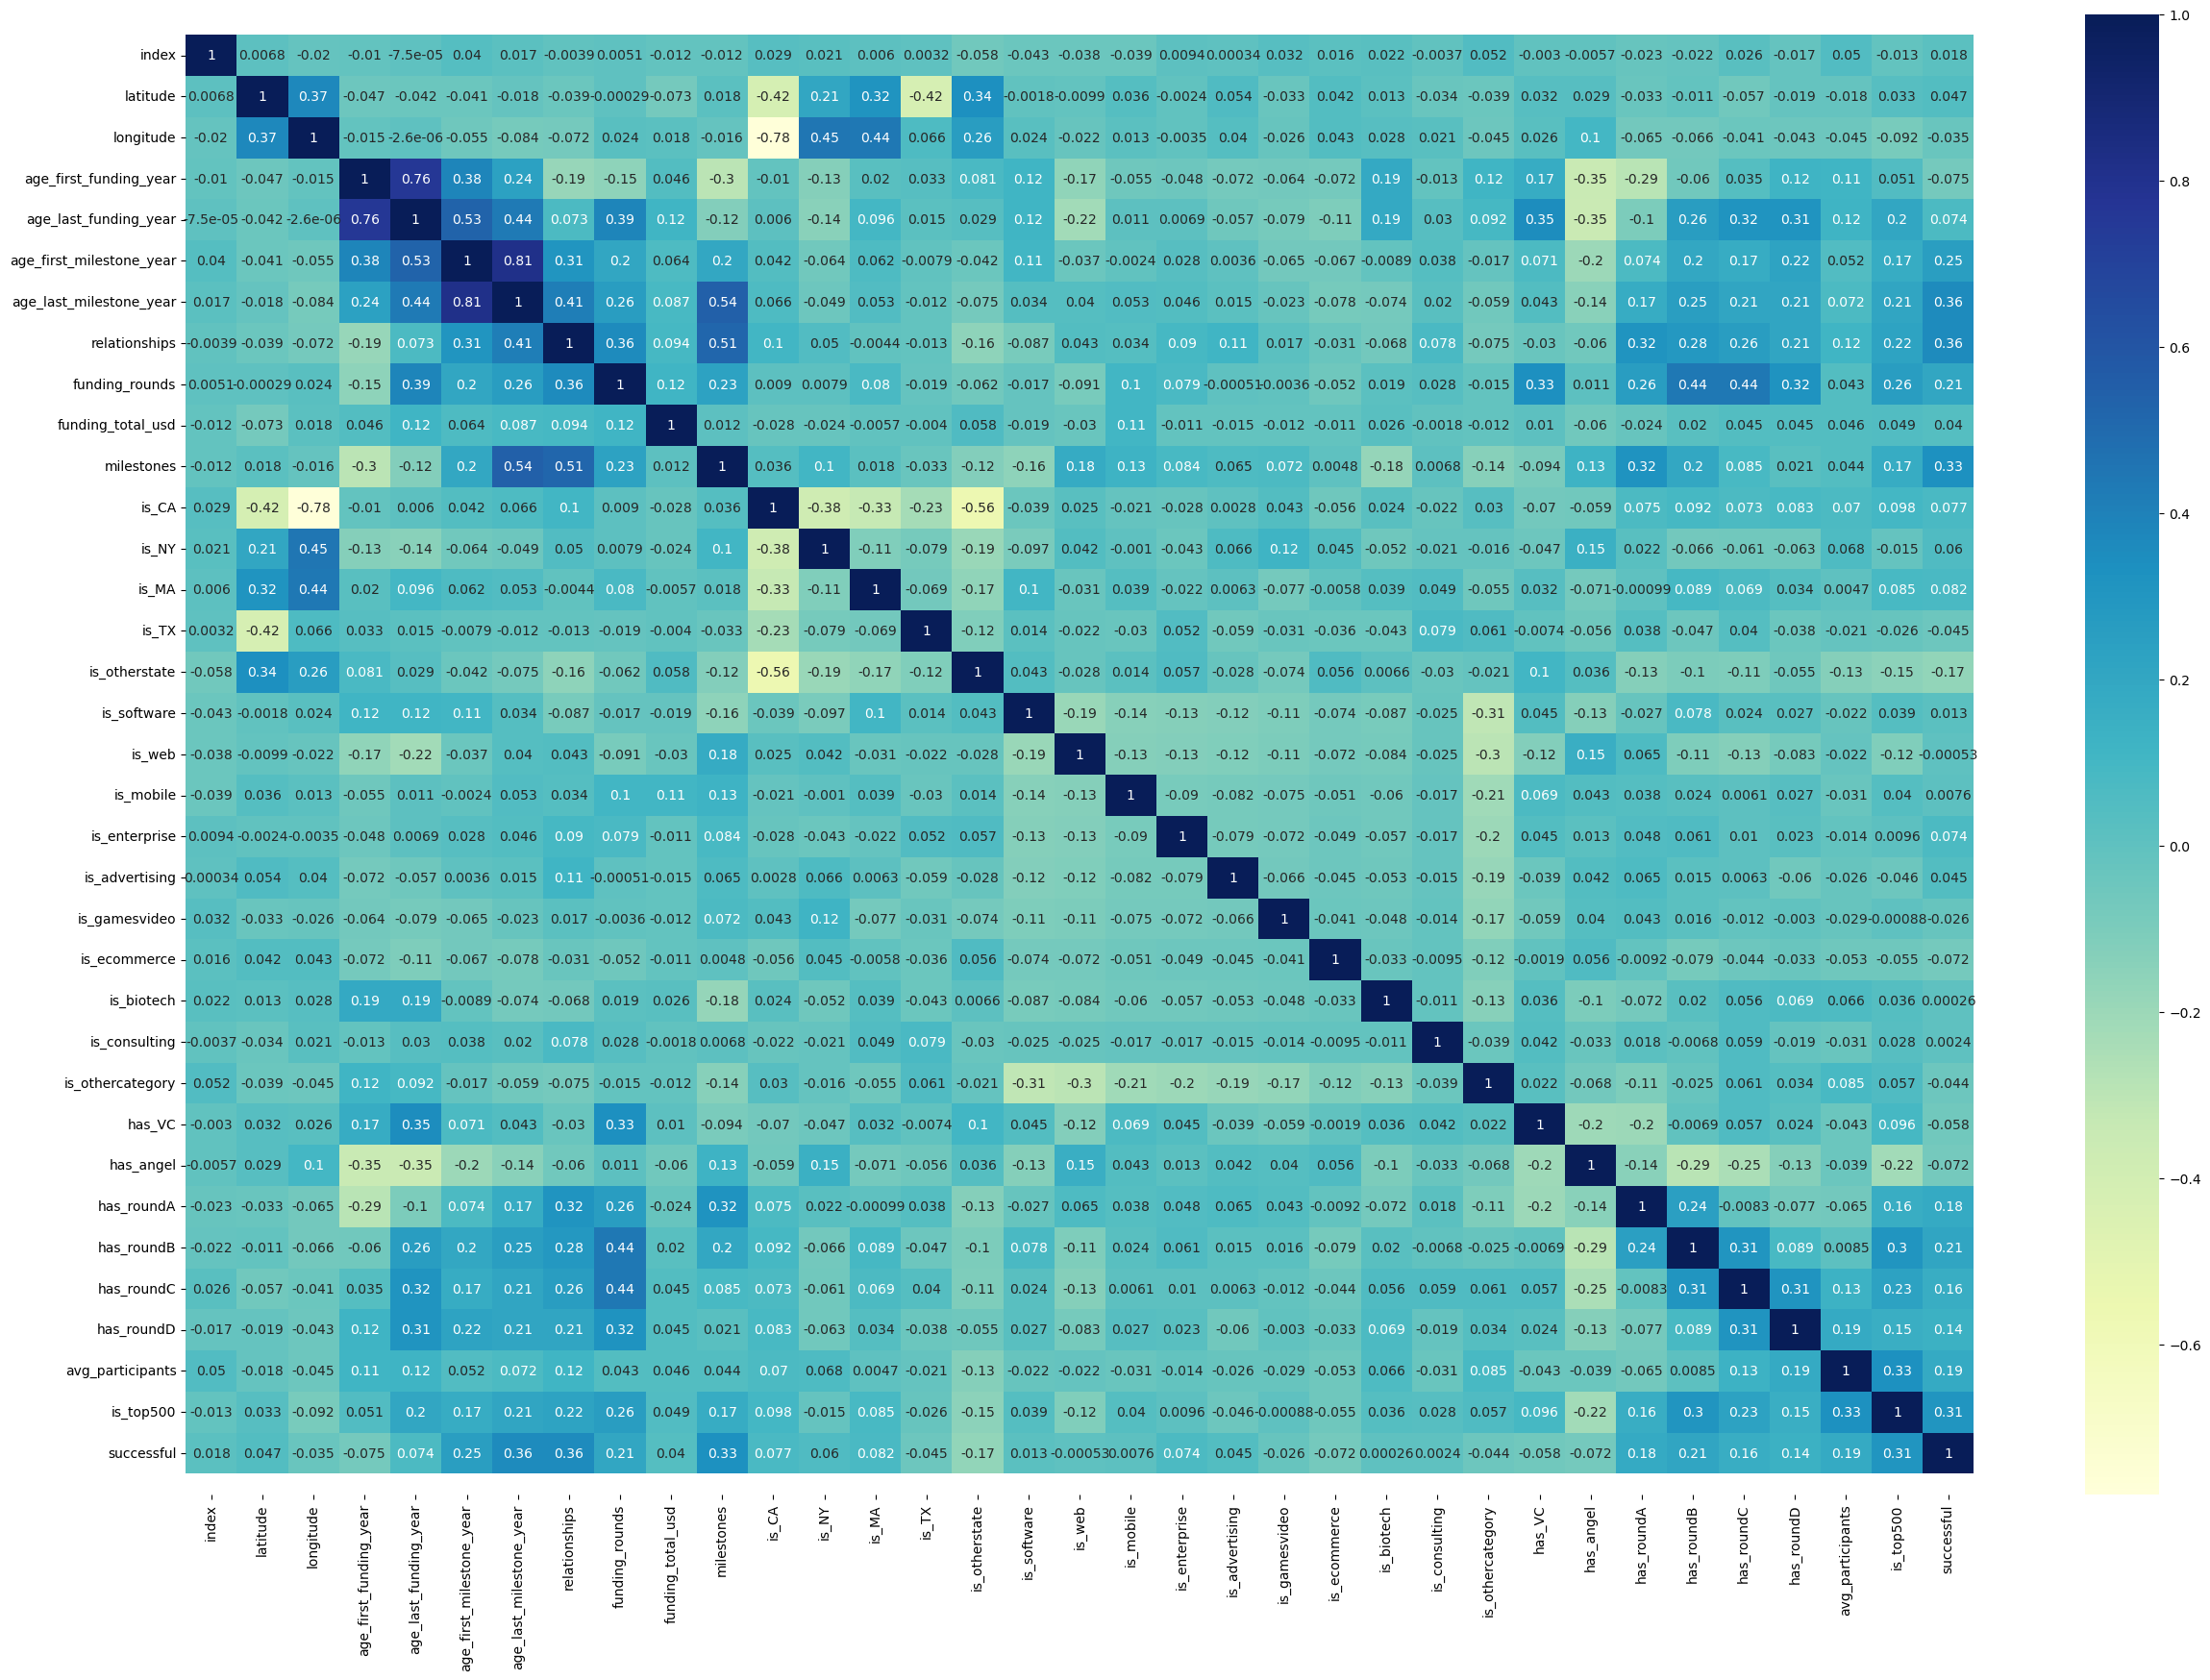

In [54]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df1.corr(numeric_only= True),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [56]:
df1

,index,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,successful
0,0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,12/31/2013,4/1/2009,...,1,0,1,0,0,0,0,1.0000,0,1
1,1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,12/31/2013,2/14/2005,...,0,1,0,0,1,1,1,4.7500,1,1
2,2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,12/31/2013,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,1
3,3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,12/31/2013,2/17/2005,...,0,0,0,0,1,1,1,3.3333,1,1
4,4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,12/31/2013,7/9/2009,...,0,0,0,1,0,0,0,6.0000,1,1
918,919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,...,1,1,0,0,1,0,0,2.6667,1,0
919,920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,...,0,0,0,0,0,0,1,8.0000,1,0
920,921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,12/31/2013,10/5/2009,...,0,0,0,1,1,0,0,1.0000,1,1


In [57]:
df1['founded_at'] = pd.to_datetime(df1['founded_at'], errors='coerce')
df1['first_funding_at'] = pd.to_datetime(df1['first_funding_at'], errors='coerce')
df1['last_funding_at'] = pd.to_datetime(df1['last_funding_at'], errors='coerce')

In [58]:
df1

,index,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,successful
0,0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,2007-01-01,12/31/2013,2009-04-01,...,1,0,1,0,0,0,0,1.0000,0,1
1,1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,2000-01-01,12/31/2013,2005-02-14,...,0,1,0,0,1,1,1,4.7500,1,1
2,2,CA,32.901049,-117.192656,92121,San Diego,Plixi,2009-03-18,12/31/2013,2010-03-30,...,0,0,0,1,0,0,0,4.0000,1,1
3,3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,2002-01-01,12/31/2013,2005-02-17,...,0,0,0,0,1,1,1,3.3333,1,1
4,4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,2010-08-01,10/1/2012,2010-08-01,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,2009-01-01,12/31/2013,2009-07-09,...,0,0,0,1,0,0,0,6.0000,1,1
918,919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1998-01-01,6/25/2008,2005-04-01,...,1,1,0,0,1,0,0,2.6667,1,0
919,920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1999-01-01,6/17/2012,2007-06-29,...,0,0,0,0,0,0,1,8.0000,1,0
920,921,CA,37.556732,-122.288378,94404,San Francisco,Causata,2009-01-01,12/31/2013,2009-10-05,...,0,0,0,1,1,0,0,1.0000,1,1


In [59]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Negative value in '{}' column  : {} ".format(age[a],(df1[age[a]]<0).any()))

Negative value in 'age_first_funding_year' column  : True 
Negative value in 'age_last_funding_year' column  : True 
Negative value in 'age_first_milestone_year' column  : True 
Negative value in 'age_last_milestone_year' column  : True 


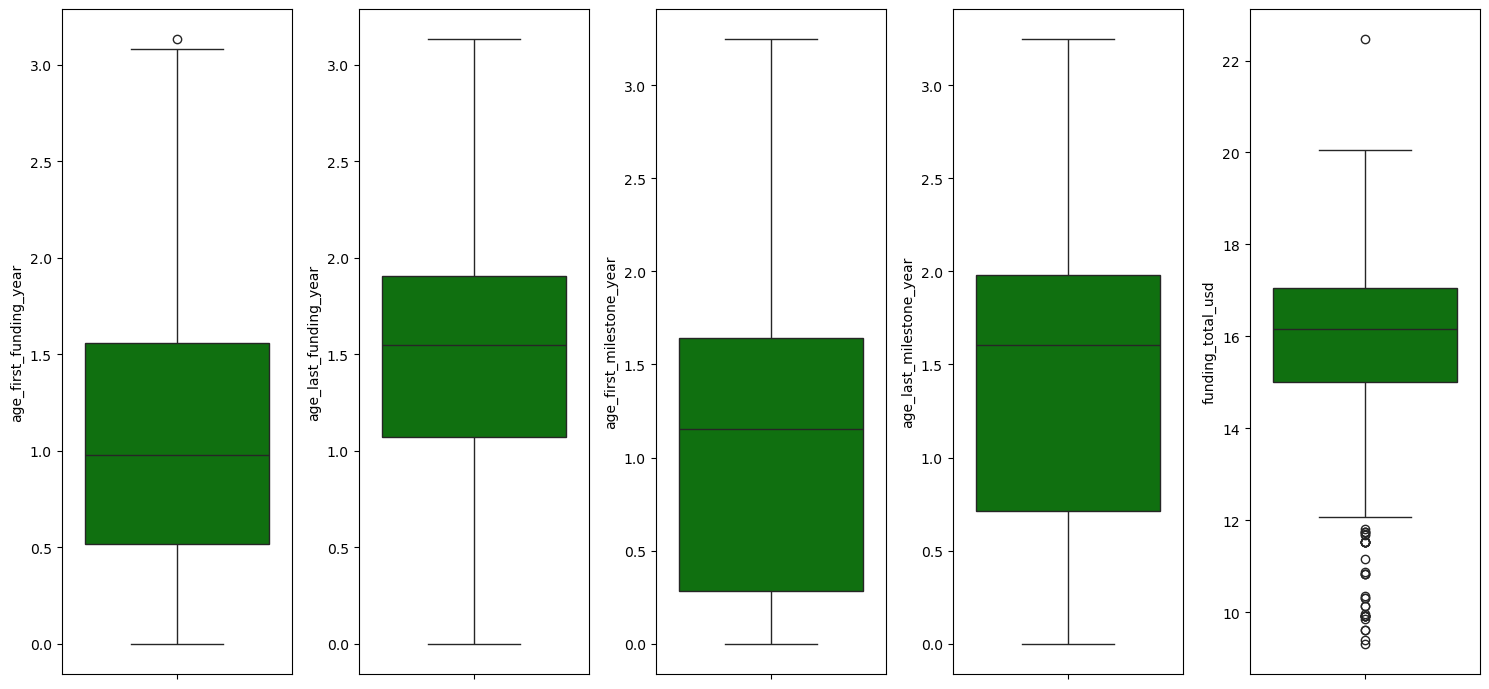

In [60]:
df1=df1.drop(df1[df1.age_first_funding_year<0].index)
df1=df1.drop(df1[df1.age_last_funding_year<0].index)
df1=df1.drop(df1[df1.age_first_milestone_year<0].index)
df1=df1.drop(df1[df1.age_last_milestone_year<0].index)

# logging the numerical values
df1["age_first_funding_year"] = np.log1p(df1["age_first_funding_year"])
df1["age_last_funding_year"] = np.log1p(df1["age_last_funding_year"])
df1["age_first_milestone_year"] = np.log1p(df1["age_first_milestone_year"])
df1["age_last_milestone_year"] = np.log1p(df1["age_last_milestone_year"])
df1["funding_total_usd"] = np.log1p(df1["funding_total_usd"])

# checking for outliers
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df1[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [61]:
# combined round columns into one
df1['has_RoundABCD'] = np.where((df1['has_roundA'] == 1) | (df1['has_roundB'] == 1) | (df1['has_roundC'] == 1) | (df1['has_roundD'] == 1), 1, 0)

# combined vc and angel columns into one
df1['has_Investor'] = np.where((df1['has_VC'] == 1) | (df1['has_angel'] == 1), 1, 0)

# combined new columns into one
df1['has_Seed'] = np.where((df1['has_RoundABCD'] == 0) & (df1['has_Investor'] == 1), 1, 0)

# created to combine startups with no funding rounds, vc and angel
df1['invalid_startup'] = np.where((df1['has_RoundABCD'] == 0) & (df1['has_VC'] == 0) & (df1['has_angel'] == 0), 1, 0)

# column to get age of startup
df1.founded_at=pd.to_datetime(df1.founded_at)
df1.closed_at=pd.to_datetime(df1.closed_at)
df1['age_closed_startup'] = df1.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

df1['age_startup_year'] = df1['age_closed_startup'].dt.days /365

C:\Users\sreya\AppData\Local\Temp\ipykernel_21932\156281287.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


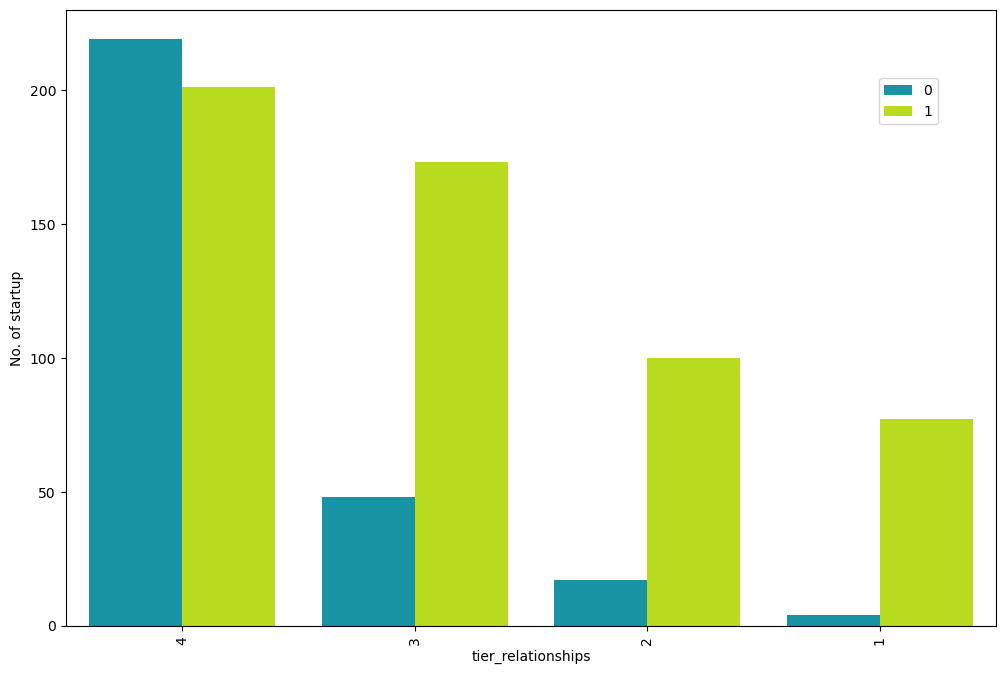

In [63]:
conditions = [
    (df1['relationships'] <= 5),
    (df1['relationships'] > 5) & (df1['relationships'] <= 10),
    (df1['relationships'] > 10) & (df1['relationships'] <= 16),
    (df1['relationships'] > 16)
]

# Change string values to integers
values = [4, 3, 2, 1]  # Changed from strings to integers

# Add a default value that matches the data type of values
df1['tier_relationships'] = np.select(conditions, values, default=0)  # Added default=0

fig, ax = plt.subplots(figsize=(12,8))

plot = sns.countplot(x="tier_relationships", hue="successful", data=df1, palette="nipy_spectral",
              order=df1.tier_relationships.value_counts().index)

plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plot = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [64]:
df1['tier_relationships'] = df1.tier_relationships.astype(int)

In [74]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,912,913,914,915,916,917,918,919,920,921
age_first_funding_year,1.178440,1.812542,0.709463,1.418641,0.000000,1.712933,1.000816,0.973276,1.523074,0.982528,...,0.828726,1.438341,1.813439,0.000000,1.891620,0.417262,2.110468,2.250860,0.564689,1.415975
age_last_funding_year,1.386969,2.397650,0.709463,1.842944,0.981517,1.712933,1.826322,2.049188,2.494221,1.737814,...,0.828726,1.438341,1.813439,1.595096,2.278180,0.417262,2.325070,2.250860,1.343622,1.415975
age_first_milestone_year,1.734925,2.080129,0.899145,1.946296,0.037681,1.792209,1.386294,1.887903,2.197836,1.365530,...,2.094736,1.386969,1.425900,1.364841,2.251723,0.457931,1.946296,2.303135,0.564689,1.609978
age_last_milestone_year,2.041753,2.080129,1.164868,1.946296,0.037681,1.792209,2.029227,2.123650,2.397395,1.962219,...,2.094736,1.726670,2.252586,1.907199,2.278180,1.709464,1.946296,2.303135,1.576005,1.609978
funding_rounds,3.000000,4.000000,1.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000
funding_total_usd,12.834684,17.506887,14.771022,17.504390,14.077876,15.830414,17.073607,17.344808,16.082469,15.564711,...,14.508658,14.808763,14.508658,16.705882,18.623622,13.910822,17.766754,17.599700,16.556351,16.811243
milestones,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
is_CA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
is_NY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
is_MA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [66]:
df1 = df1.drop(['relationships','index', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'latitude', 'longitude', 'zip_code', 'city', 'state_code','category_code', 'age_closed_startup'], axis=1)

In [73]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,912,913,914,915,916,917,918,919,920,921
age_first_funding_year,1.178440,1.812542,0.709463,1.418641,0.000000,1.712933,1.000816,0.973276,1.523074,0.982528,...,0.828726,1.438341,1.813439,0.000000,1.891620,0.417262,2.110468,2.250860,0.564689,1.415975
age_last_funding_year,1.386969,2.397650,0.709463,1.842944,0.981517,1.712933,1.826322,2.049188,2.494221,1.737814,...,0.828726,1.438341,1.813439,1.595096,2.278180,0.417262,2.325070,2.250860,1.343622,1.415975
age_first_milestone_year,1.734925,2.080129,0.899145,1.946296,0.037681,1.792209,1.386294,1.887903,2.197836,1.365530,...,2.094736,1.386969,1.425900,1.364841,2.251723,0.457931,1.946296,2.303135,0.564689,1.609978
age_last_milestone_year,2.041753,2.080129,1.164868,1.946296,0.037681,1.792209,2.029227,2.123650,2.397395,1.962219,...,2.094736,1.726670,2.252586,1.907199,2.278180,1.709464,1.946296,2.303135,1.576005,1.609978
funding_rounds,3.000000,4.000000,1.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000
funding_total_usd,12.834684,17.506887,14.771022,17.504390,14.077876,15.830414,17.073607,17.344808,16.082469,15.564711,...,14.508658,14.808763,14.508658,16.705882,18.623622,13.910822,17.766754,17.599700,16.556351,16.811243
milestones,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
is_CA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
is_NY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
is_MA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [68]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['successful'])
y = df1['successful']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        58
           1       0.86      0.90      0.88       110

    accuracy                           0.84       168
   macro avg       0.83      0.81      0.82       168
weighted avg       0.84      0.84      0.84       168

ROC-AUC: 0.8547021943573668


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))


Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        58
           1       0.85      0.85      0.85       110

    accuracy                           0.80       168
   macro avg       0.78      0.78      0.78       168
weighted avg       0.80      0.80      0.80       168

ROC-AUC: 0.7807210031347962


In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.76      0.64      0.69        58
           1       0.82      0.89      0.86       110

    accuracy                           0.80       168
   macro avg       0.79      0.76      0.77       168
weighted avg       0.80      0.80      0.80       168

ROC-AUC: 0.8837774294670846


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


Gradient Boosting
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        58
           1       0.86      0.88      0.87       110

    accuracy                           0.83       168
   macro avg       0.81      0.80      0.81       168
weighted avg       0.83      0.83      0.83       168

ROC-AUC: 0.868808777429467


“Although Random Forest achieved a marginally higher ROC-AUC, Gradient Boosting was selected as the final model due to its higher precision and lower false-positive rate, which is more suitable for startup success prediction where incorrect success predictions are costly.